In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [170]:
data= pd.read_csv(r"/content/IPL_data_2022.csv")

In [171]:
data

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,70,"May 22,2022","Wankhede Stadium, Mumbai",Hyderabad,Punjab,Group,Hyderabad,Bat,157,8,160,5,Punjab,Wickets,5,Harpreet Brar,Liam Livingstone,49,Harpreet Brar,3--26
70,71,"May 24,2022","Eden Gardens, Kolkata",Gujarat,Rajasthan,Playoff,Gujarat,Field,188,6,191,3,Gujarat,Wickets,7,David Miller,Jos Buttler,89,Hardik Pandya,1--14
71,72,"May 25,2022","Eden Gardens, Kolkata",Banglore,Lucknow,Playoff,Lucknow,Field,207,4,193,6,Banglore,Runs,14,Rajat Patidar,Rajat Patidar,112,Josh Hazlewood,3--43
72,73,"May 27,2022","Narendra Modi Stadium, Ahmedabad",Banglore,Rajasthan,Playoff,Rajasthan,Field,157,8,161,3,Rajasthan,Wickets,7,Jos Buttler,Jos Buttler,106,Prasidh Krishna,3--22


# Understand team performance patterns across the season

In [172]:
data.columns

Index(['match_id', 'date', 'venue', 'team1', 'team2', 'stage', 'toss_winner',
       'toss_decision', 'first_ings_score', 'first_ings_wkts',
       'second_ings_score', 'second_ings_wkts', 'match_winner', 'won_by',
       'margin', 'player_of_the_match', 'top_scorer', 'highscore',
       'best_bowling', 'best_bowling_figure'],
      dtype='object')

In [173]:
teams = list(pd.unique(data[['team1','team2']].values.ravel()))
print(teams)

['Chennai', 'Kolkata', 'Delhi', 'Mumbai', 'Banglore', 'Punjab', 'Gujarat', 'Lucknow', 'Hyderabad', 'Rajasthan']


In [174]:
# colors = [
# "blue","red","green","yellow","orange","purple","pink","brown","black","white",
# "gray","cyan","magenta","lime","teal","navy","maroon","olive","coral","turquoise",
# "gold","silver","beige","ivory","lavender","salmon","khaki","plum","orchid",
# "crimson","indigo","violet","tan","chocolate","tomato","peru","dodgerblue",
# "deepskyblue","skyblue","steelblue","royalblue","darkblue","midnightblue",
# "lightblue","powderblue","paleturquoise","darkcyan","aquamarine","springgreen",
# "seagreen","forestgreen","darkgreen","lightgreen","greenyellow","lawngreen",
# "goldenrod","darkgoldenrod","wheat","burlywood","sandybrown","darkorange",
# "orangered","firebrick","darkred","lightcoral","hotpink","deeppink","palevioletred"
# ]

# Number of Matches win by each Team in IPL_2022 - Bar Graph

In [175]:
import pandas as pd
import plotly.express as px

wins = data['match_winner'].value_counts().reset_index()
wins.columns = ['match_winner','wins']

# bar chart
fig = px.bar(wins,x="match_winner",y="wins",title="Number of Matches Won by Team",height=400)
fig.show()


# Number of matches won by defending and chasing team

In [176]:
data["won_by_type"] = data["won_by"].map({"Wickets": "Chasing","Runs": "Defending"})

# remove matches with no result
data = data.dropna(subset=["won_by_type"])

# count
won_by = data["won_by_type"].value_counts()

labels = won_by.index
counts = won_by.values
colors = ['royalblue','red']   # Chasing , Defending

# pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=counts)])

fig.update_layout(
    title_text="Number of matches won by Defending and Chasing team",
    height=400 )

fig.update_traces( hoverinfo='label+percent',textinfo='value',textfont_size=26,marker=dict(colors=colors, line=dict(color='black', width=2)))
fig.show()


# Identify top performing bowlers

In [177]:
top_bowlers = data['best_bowling'].dropna().value_counts().reset_index()
top_bowlers.columns = ['bowler','awards']
fig = px.bar(top_bowlers,x="bowler",y="awards",title="Top Performing Bowlers in IPL 2022",height=600)
fig.show()


# Identify top performing batsmen

In [178]:
# count top scorers
top_batsman = data['top_scorer'].dropna().value_counts().reset_index()
top_batsman.columns = ['batter','awards']


fig = px.bar(top_batsman,x="batter",y="awards",title="Top Performing Batsmen in IPL 2022",height=600)
fig.show()


# Identify Most Man_of_the_Match_Player

In [179]:
# count Man of the Match awards
Man_of_the_Match = data['player_of_the_match'].dropna().value_counts().reset_index()
Man_of_the_Match.columns = ['player','awards']

# plot
fig = px.bar(Man_of_the_Match,x="player",y="awards",title="Most Man of the Match Awards - IPL 2022",height=600)
fig.show()

# print the top player
print("Most Man of the Match Player:", Man_of_the_Match.iloc[0]['player'])
print("Awards Won:", Man_of_the_Match.iloc[0]['awards'])


Most Man of the Match Player: Kuldeep Yadav
Awards Won: 4


# Number of matches won by team - Pie Chart

In [180]:
import pandas as pd
import plotly.graph_objects as go

# load data
data = pd.read_csv(r"/content/IPL_data_2022.csv")

# ---- convert team full name -> short name ----
def short_name(team):
    if pd.isna(team):
        return None

    team = str(team).lower()

    if "chennai" in team: return "CSK"
    if "mumbai" in team: return "MI"
    if "bangalore" in team or "bengaluru" in team: return "RCB"
    if "kolkata" in team: return "KKR"
    if "delhi" in team: return "DC"
    if "punjab" in team: return "PBKS"
    if "rajasthan" in team: return "RR"
    if "hyderabad" in team: return "SRH"
    if "gujarat" in team: return "GT"
    if "lucknow" in team: return "LSG"
    return "Other"

# new column
data["team_short"] = data["match_winner"].apply(short_name)

# ---- count wins ----
won_by = data["team_short"].value_counts()

labels = won_by.index.tolist()
counts = won_by.values.tolist()

# IPL team colors
team_colors = {
    "CSK":"#F7DC00",
    "MI":"#004BA0",
    "RCB":"#D71920",
    "KKR":"#3A225D",
    "DC":"#17449B",
    "PBKS":"#ED1C24",
    "RR":"#EA1A85",
    "SRH":"#FF822A",
    "GT":"#1C1C1C",
    "LSG":"#00AEEF",
    "Other":"#A9A9A9"
}

colors = [team_colors.get(i, "#A9A9A9") for i in labels]

# ---- donut pie chart ----
fig = go.Figure(data=[go.Pie(
    labels=labels,
    values=counts,
    hole=0.45,
    textinfo="label+percent",
    marker=dict(colors=colors, line=dict(color="white", width=2))
)])

fig.update_layout(
    title="Number of Matches Won by Each Team (IPL 2022)",
    title_x=0.5,
    height=500
)

fig.show()


# Top Scorer in IPL 2022 Match-wise

In [181]:
# convert to number
data['highscore'] = pd.to_numeric(data['highscore'], errors='coerce')

# remove invalid rows
data = data.dropna(subset=['top_scorer','highscore'])

# plot (match wise performance graph)
fig = px.bar(data,x="top_scorer",y="highscore",color="highscore",title="Top Scorer in IPL 2022 (Match-wise Performances)",height=700)
fig.show()


# Top Scorer in IPL 2022 Highest Individual

In [182]:
# convert highscore to numeric (safety)
data['highscore'] = pd.to_numeric(data['highscore'], errors='coerce')

# plot
fig = px.bar(top_scores,x="top_scorer",y="highscore",color="highscore",title="Top Scorers (Highest Individual Score) IPL 2022",height=700)
fig.show()


# Number of matches won and lost after winning toss

In [183]:
import pandas as pd

# load dataset
df = pd.read_csv(r"/content/IPL_data_2022.csv")

# keep only useful columns
df = df[['toss_winner', 'match_winner']].dropna()

df.head()

# create a column: did toss winner win the match?
df['toss_win_match'] = df['toss_winner'] == df['match_winner']

# calculate percentage
toss_advantage = df['toss_win_match'].mean() * 100

print(f"Toss winner also won the match: {toss_advantage:.2f}% times")

wins_after_toss = df[df['toss_win_match'] == True].shape[0]
loss_after_toss = df[df['toss_win_match'] == False].shape[0]

print("Matches won after winning toss:", wins_after_toss)
print("Matches lost after winning toss:", loss_after_toss)



Toss winner also won the match: 48.65% times
Matches won after winning toss: 36
Matches lost after winning toss: 38


# Does winning the toss increase winning chances?

Toss winner also won match: 48.65%
Wins after winning toss: 36
Loss after winning toss: 38


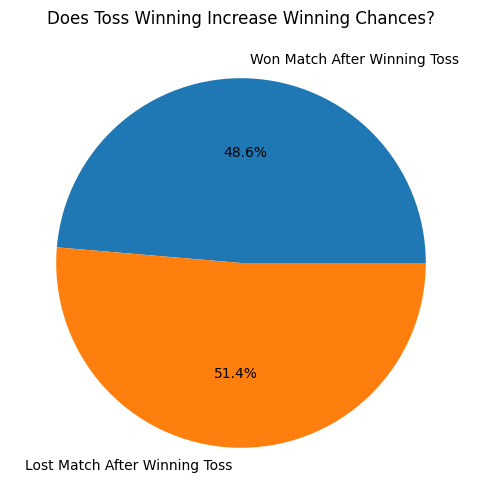

P-value: 0.9075606176124984
No strong statistical evidence that toss affects result


In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binomtest

df = pd.read_csv(r"/content/IPL_data_2022.csv")

df = df[['toss_winner','match_winner']].dropna()

df['toss_win_match'] = df['toss_winner'] == df['match_winner']

# percentage
toss_advantage = df['toss_win_match'].mean()*100
print(f"Toss winner also won match: {toss_advantage:.2f}%")

# counts
wins_after_toss = df['toss_win_match'].sum()
loss_after_toss = len(df) - wins_after_toss

print("Wins after winning toss:", wins_after_toss)
print("Loss after winning toss:", loss_after_toss)

# Visualization - Pie Chart
labels = ['Won Match After Winning Toss','Lost Match After Winning Toss']
values = [wins_after_toss, loss_after_toss]

plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title("Does Toss Winning Increase Winning Chances?")
plt.show()

# Statistical Test - P-value
total_matches = len(df)
result = binomtest(wins_after_toss, total_matches, 0.5)

print("P-value:", result.pvalue)

if result.pvalue < 0.05:
    print("Toss has statistically significant impact")
else:
    print("No strong statistical evidence that toss affects result")
